> # **FINAL PROJECT - Exploratory Data Analysis and ML Application**
> #### **DSAI 302 Spring 2024**


>**Name**: Tarık Emre Tıraş
>
>**Student Number**: 2023211105

### **Dataset Description:**

The Pima Indians Diabetes dataset from Kaggle contains information about individuals from the Pima Indian community and their medical attributes, with the target variable indicating whether or not the individual developed diabetes.

Now check out the data dictionary below to get to know more about the dataset.

| Variable                | Definition                                               | Key/Values                      |
|-------------------------|----------------------------------------------------------|---------------------------------|
| Pregnancies             | Number of times pregnant                                 | Continuous numerical values     |
| Glucose                 | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | Continuous numerical values |
| BloodPressure           | Diastolic blood pressure (mm Hg)                         | Continuous numerical values     |
| SkinThickness           | Triceps skin fold thickness (mm)                         | Continuous numerical values     |
| Insulin                 | 2-Hour serum insulin (mu U/ml)                           | Continuous numerical values     |
| BMI                     | Body mass index (weight in kg/(height in m)^2)           | Continuous numerical values     |
| DiabetesPedigreeFunction| Diabetes pedigree function                               | Continuous numerical values     |
| Age                     | Age (years)                                              | Continuous numerical values     |
| Outcome                 | Class variable (0 or 1) indicating diabetes diagnosis   | 0 = No diabetes, 1 = Diabetes   |


###**Loading the Database from Kaggle**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kanchana1990/vehicle-dataset-2024                            Vehicle Dataset 2024                                308KB  2024-05-29 20:02:30            726         27  1.0              
rohit265/credit-card-eligibility-data-determining-factors    Credit Card Eligibility Data: Determining Factors   296KB  2024-05-18 11:31:28           1614         30  1.0              
piterfm/football-soccer-uefa-euro-1960-2024                  Football - Soccer - UEFA EURO, 1960 - 2024           87KB  2024-05-27 19:28:57            703         23 

In [3]:
import os
from google.colab import userdata

os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

In [4]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 16.7MB/s]


In [5]:
!unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


# **PART 1 - Data Cleaning and E.D.A.**




###**Overview of the Data**

1. First, we import NumPy, Pandas, Matplotlib, Seaborn and other necesarry libraries.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


2. We read the .csv file and save it into a Pandas DataFrame. We use `pd.read_csv()` function.

In [7]:
df = pd.read_csv('diabetes.csv')


3. Let us take a general look at the data. How many rows and columns does this dataset have?  In order to get some insight into the data we first display the first 12 rows of the DataFrame with `.head()`




In [8]:
df.head(12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


4. To learn what are the data types of the columns, we use Pandas library's `.info()` function to get more information about the DataFrame columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Handling Missing Values**

 1. It can be seen on .head() that there are features that contain zero. For example, a Glucose level of zero is physiologically implausible and likely represents missing or incomplete data.


 We will get rid of them by replacing them with NaN.

In [10]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

2. For the column 'Glucose', first plot a histogram to see the distribution of glucose.

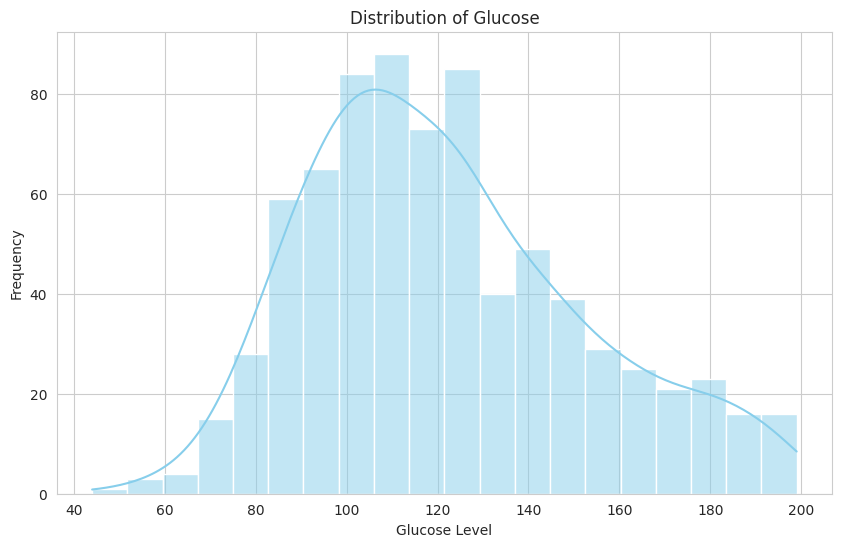

In [11]:
# Plot a histogram of 'Glucose'
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

3. When we look at the shape of the histogram we had plotted, we see that the graph has almost a normally distributed shape. Therefore, we would assume that the glucose variable has a normal distribution. Firstly, we need the mean and the standard deviation of this column. We will use `describe()` function again to see the means and stds of all numerical columns.

In [12]:
# Parameters for the normal distribution
mu = df['Glucose'].mean()
sigma = df['Glucose'].std()
lower_bound = df['Glucose'].min()
upper_bound = df['Glucose'].max()

# Find the number of missing values
n_missing = df['Glucose'].isna().sum()

# Generate random values from a truncated normal distribution
a = (lower_bound - mu) / sigma
b = (upper_bound - mu) / sigma

# Sample from the normal distribution to fill NaNs
missing_values = truncnorm.rvs(a, b, loc=mu, scale=sigma, size=n_missing).round(0)

# Fill the NaNs in the DataFrame
df.loc[df['Glucose'].isna(), 'Glucose'] = missing_values

4. Let us see what has changed.

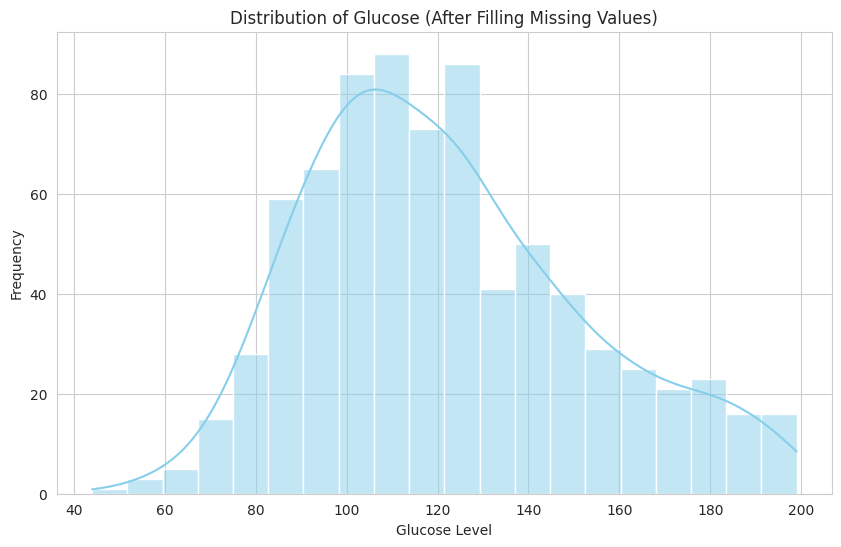

In [13]:
# Plot a histogram of 'Glucose' after fillin missing values
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Glucose (After Filling Missing Values)')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

5. We should take a look at the distribution of blood pressure to decide which method to apply.


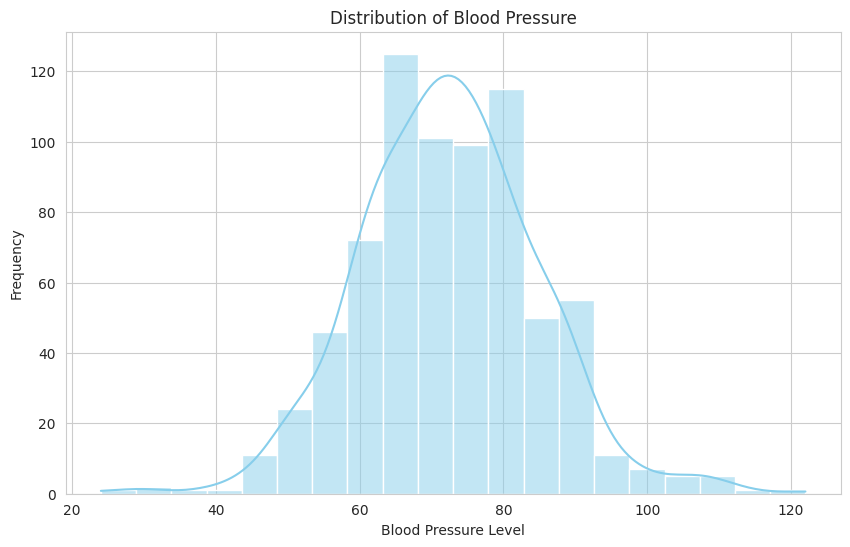

In [14]:
# Plot a histogram of 'BloodPressure'
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['BloodPressure'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Frequency')
plt.show()

6. The distribution of blood pressure is also similar to normal distribution. We shall apply the same process here too.

In [15]:
# Find the number of missing values
n_missing = df['BloodPressure'].isna().sum()

# Generate random values from a truncated normal distribution
c = (lower_bound - mu) / sigma
d = (upper_bound - mu) / sigma

# Sample from the normal distribution to fill NaNs
missing_values = truncnorm.rvs(c, d, loc=mu, scale=sigma, size=n_missing).round(0)

# Fill the NaNs in the DataFrame
df.loc[df['BloodPressure'].isna(), 'BloodPressure'] = missing_values

7. We can see what has changed.

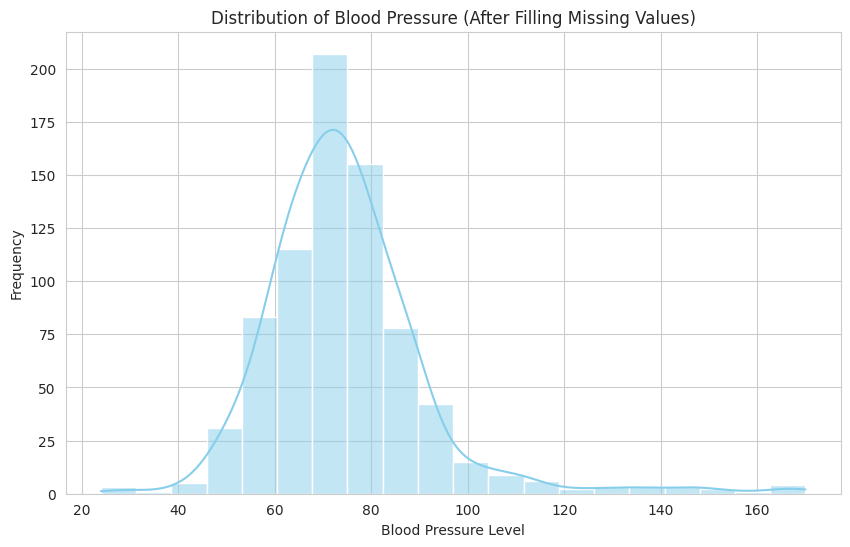

In [16]:
# Plot a histogram of the 'BloodPressure' column
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['BloodPressure'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Blood Pressure (After Filling Missing Values)')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Frequency')
plt.show()

8. We should take a look at the distribution of skin thickness to decide which method to apply.

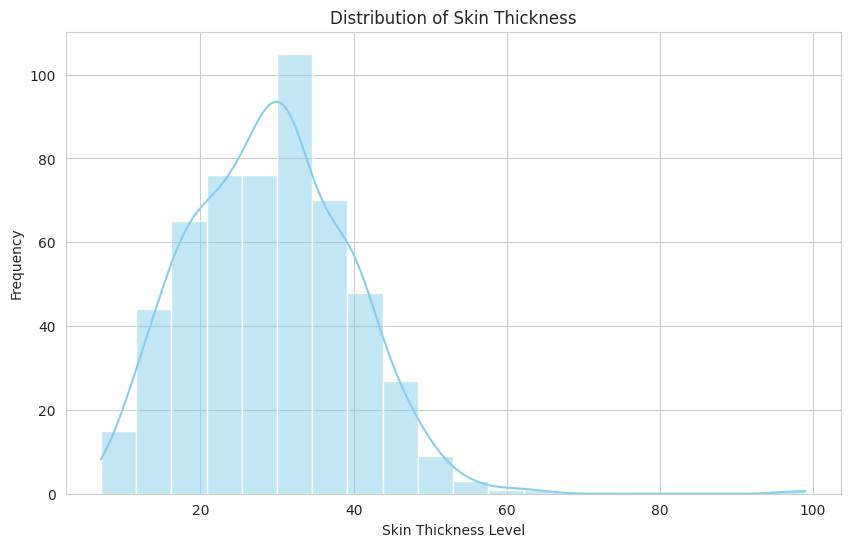

In [17]:
# Plot a histogram of 'SkinThickness'
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['SkinThickness'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Skin Thickness')
plt.xlabel('Skin Thickness Level')
plt.ylabel('Frequency')
plt.show()

9. We cannot apply the previous processes for skin thickness since it is not related to normal distribution. To replace missing values, we'll use median by target (Outcome) this time.

In [18]:
# Calculate the median of a given variable for each target value in the dataframe
def median_target(variable):
    non_null_data = df[df[variable].notnull()]
    grouped_medians = non_null_data[[variable, 'Outcome']].groupby(['Outcome'])[[variable]].median().reset_index()
    return grouped_medians

In [19]:
# Determine the median value of skin thickness
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [20]:
# Fill missing values in 'SkinThickness' based on 'Outcome'
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

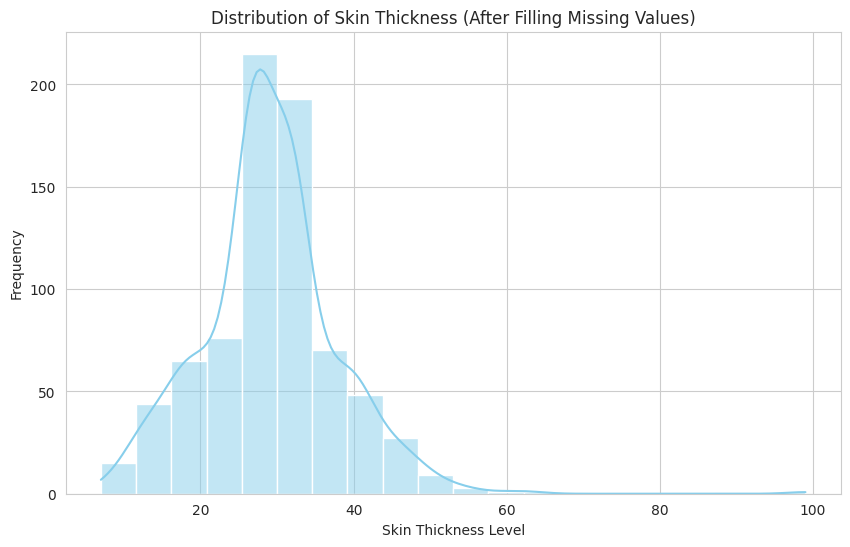

In [21]:
# Plot a histogram of 'SkinThickness' after filling missing values
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['SkinThickness'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Skin Thickness (After Filling Missing Values)')
plt.xlabel('Skin Thickness Level')
plt.ylabel('Frequency')
plt.show()

10. We should take a look at the distribution of skin thickness to decide which method to apply.

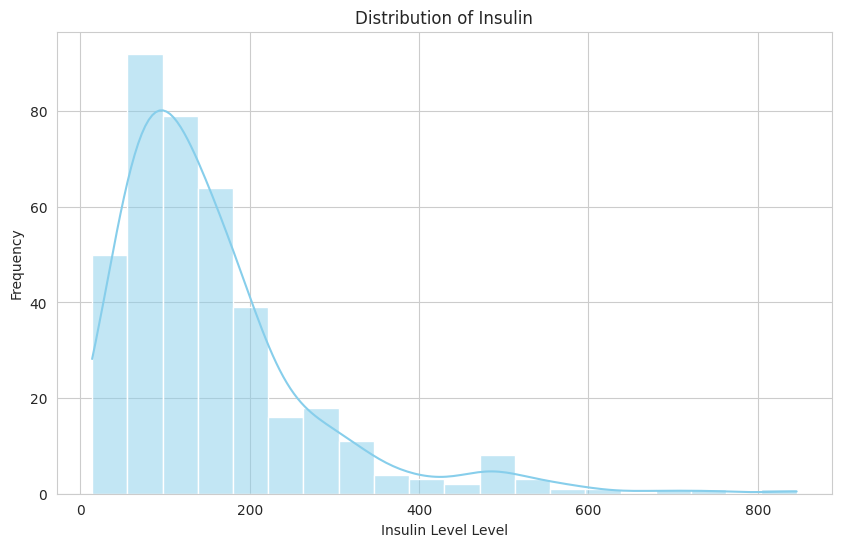

In [22]:
# Plot a histogram of Insulin
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Insulin'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Insulin')
plt.xlabel('Insulin Level Level')
plt.ylabel('Frequency')
plt.show()

11. We are unable to perform normal distribution method here too. We will continue using median values.

In [23]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [24]:
# Fill missing values in 'Insulin' based on 'Outcome'
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

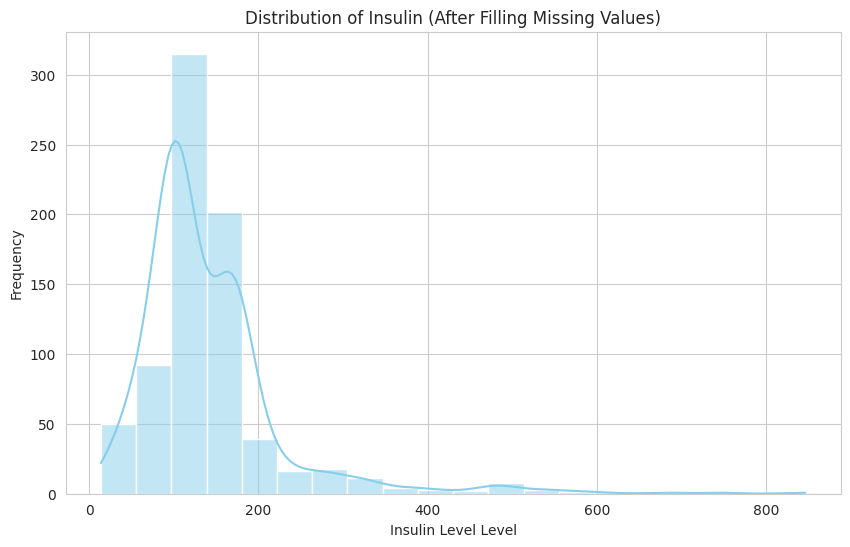

In [25]:
# Plot a histogram of 'Insulin' after filling missing values
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Insulin'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Insulin (After Filling Missing Values)')
plt.xlabel('Insulin Level Level')
plt.ylabel('Frequency')
plt.show()

12. Same steps are applied to BMI.

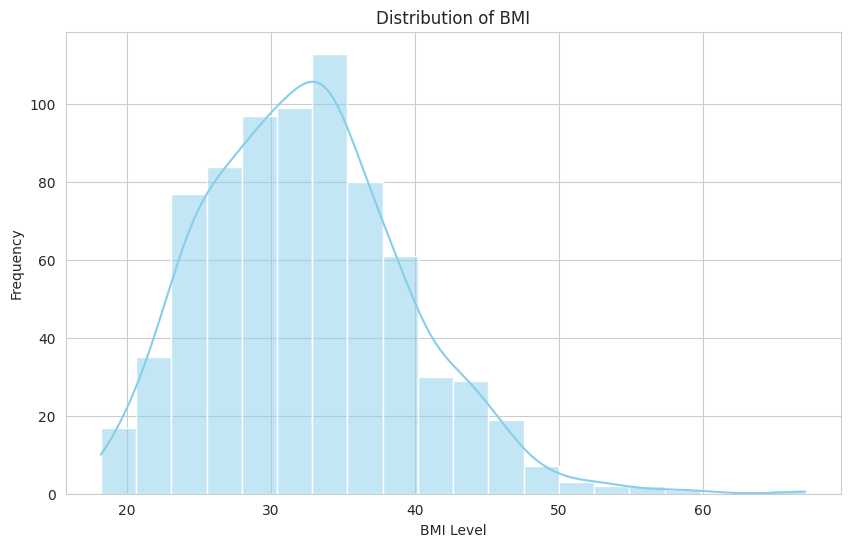

In [26]:
# Plot a histogram of BMI
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI Level')
plt.ylabel('Frequency')
plt.show()

In [27]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [28]:
# Fill missing values in 'BMI' based on 'Outcome'
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

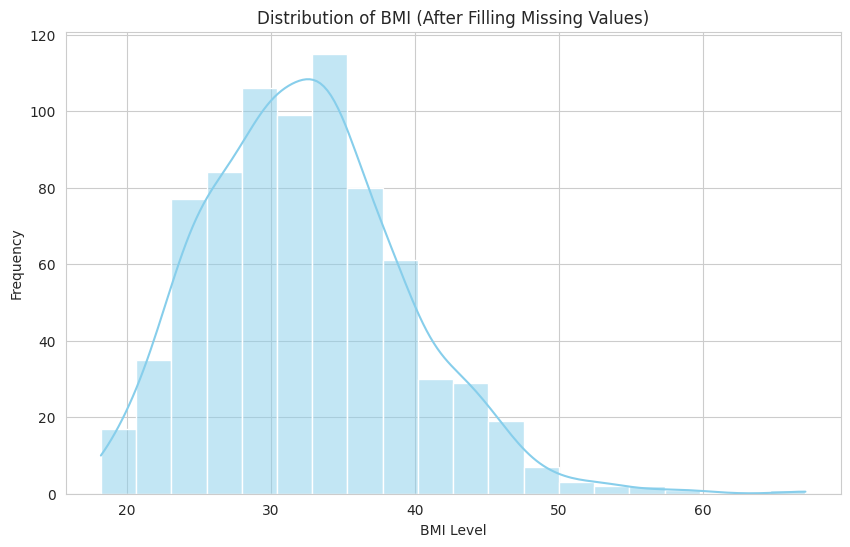

In [29]:
# Plot a histogram of BMI after filling missing values
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of BMI (After Filling Missing Values)')
plt.xlabel('BMI Level')
plt.ylabel('Frequency')
plt.show()

##**Checking Duplicates**

We need to check if there are any duplicate entries. Checking for duplicates ensures data integrity, prevents analytical distortions, and mitigates the risk of model overfitting due to redundant data points. Duplicates can introduce bias, skew statistical measures, and lead to inefficiencies in computational resource utilization.

In [30]:
# Check for duplicates in the entire dataset
duplicates = df.duplicated()

# Print the number of duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")

# See the duplicate rows
if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(df[duplicates])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


##**Descriptive Statistics**

Descriptive statistics provide a summary of the central tendency, dispersion, and shape of the dataset’s distribution, offering a clear overview of its main characteristics. This understanding will aid in identifying patterns, anomalies, and potential outliers, informing subsequent data preprocessing and analysis steps.

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.683594,74.678385,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.535723,16.959326,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,82.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,170.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##**Dealing with Outliers**

**Outlier Visualization and Identification:**

  1. Initial Visualization:
        * I will start by visualizing the distribution of the feature using box plots created by the plot_feature_outliers function. This will help me identify the presence and extent of outliers.
        * The function generates four types of box plots:
            * All Points: Shows the distribution of all data points with jitter to highlight overlapping points.
            * Only Whiskers: Displays only the whiskers of the box plot, indicating the range of non-outlier data.
            * Suspected Outliers: Highlights points that are suspected to be outliers based on the interquartile range (IQR) method.
            * Whiskers and Outliers: Shows both the whiskers and the outliers.
**Outlier Detection and Removal:**

  2. Using the Visualization:
        * By examining these plots, I can visually assess which data points are outliers. The Suspected Outliers plot is particularly useful as it isolates the data points that are considered outliers according to the IQR method.
        * This step helps in understanding the nature and distribution of the outliers before deciding on their removal.

**Define Outlier Removal Criteria:**

  3. Outliers are typically defined using the IQR method, where:
        * Q1 is the 25th percentile of the data.
        * Q3 is the 75th percentile of the data.
        * IQR is the difference between Q3 and Q1.
        * Outliers are data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

###**Outlier Visualization and Identification**

In [32]:
def plot_feature_outliers(df, feature_name):
    # Create a box plot with all data points, adding jitter for better visualization of overlapping points
    all_points = go.Box(
        y=df[feature_name],  # Feature data
        name="All Points",  # Legend label
        jitter=0.3,  # Add random noise to the data points to prevent overlap
        pointpos=-1.8,  # Position of points relative to the box plot
        boxpoints='all'  # Show all points including outliers
    )

    # Create a box plot showing only the whiskers (no points)
    whiskers_only = go.Box(
        y=df[feature_name],  # Feature data
        name="Only Whiskers",  # Legend label
        boxpoints=False  # Do not show any points
    )

    # Create a box plot highlighting suspected outliers
    suspected_outliers = go.Box(
        y=df[feature_name],  # Feature data
        name="Suspected Outliers",  # Legend label
        boxpoints='suspectedoutliers'  # Show only suspected outliers
    )

    # Create a box plot showing both whiskers and outliers
    whiskers_and_outliers = go.Box(
        y=df[feature_name],  # Feature data
        name="Whiskers and Outliers",  # Legend label
        boxpoints='outliers'  # Show only outliers
    )

    # Combine all the box plots into a single data list
    data = [all_points, whiskers_only, suspected_outliers, whiskers_and_outliers]

    # Define the layout of the plot with a title
    layout = go.Layout(
        title=f"{feature_name} Outliers"  # Title of the plot
    )

    # Create a Figure object with the data and layout, and display the plot
    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [33]:
plot_feature_outliers(df, "Pregnancies")

In [34]:
plot_feature_outliers(df, "Glucose")

In [35]:
plot_feature_outliers(df, "BloodPressure")

In [36]:
plot_feature_outliers(df, "SkinThickness")

In [37]:
plot_feature_outliers(df, "Insulin")

In [38]:
plot_feature_outliers(df, "BMI")

In [39]:
plot_feature_outliers(df, "DiabetesPedigreeFunction")

In [40]:
plot_feature_outliers(df, "Age")

###**Outlier Detection and Removal**

In [41]:
def remove_outliers_using_iqr(df, features, iqr_multiplier=1.5):

    # Create a copy of the input DataFrame
    df_without_outliers = df.copy()

    # Iterate over each feature/column
    for feature in features:
        # Calculate the first quartile (Q1)
        Q1 = df_without_outliers[feature].quantile(0.25)

        # Calculate the third quartile (Q3)
        Q3 = df_without_outliers[feature].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # Find data points outside the bounds
        outliers = df_without_outliers[(df_without_outliers[feature] < lower_bound) | (df_without_outliers[feature] > upper_bound)]

        # Remove outliers from the DataFrame
        df_without_outliers = df_without_outliers.drop(outliers.index)

    return df_without_outliers

In [42]:
cleaned_data = remove_outliers_using_iqr(df,["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction", "Age","Outcome"])

##**Data Visualization**

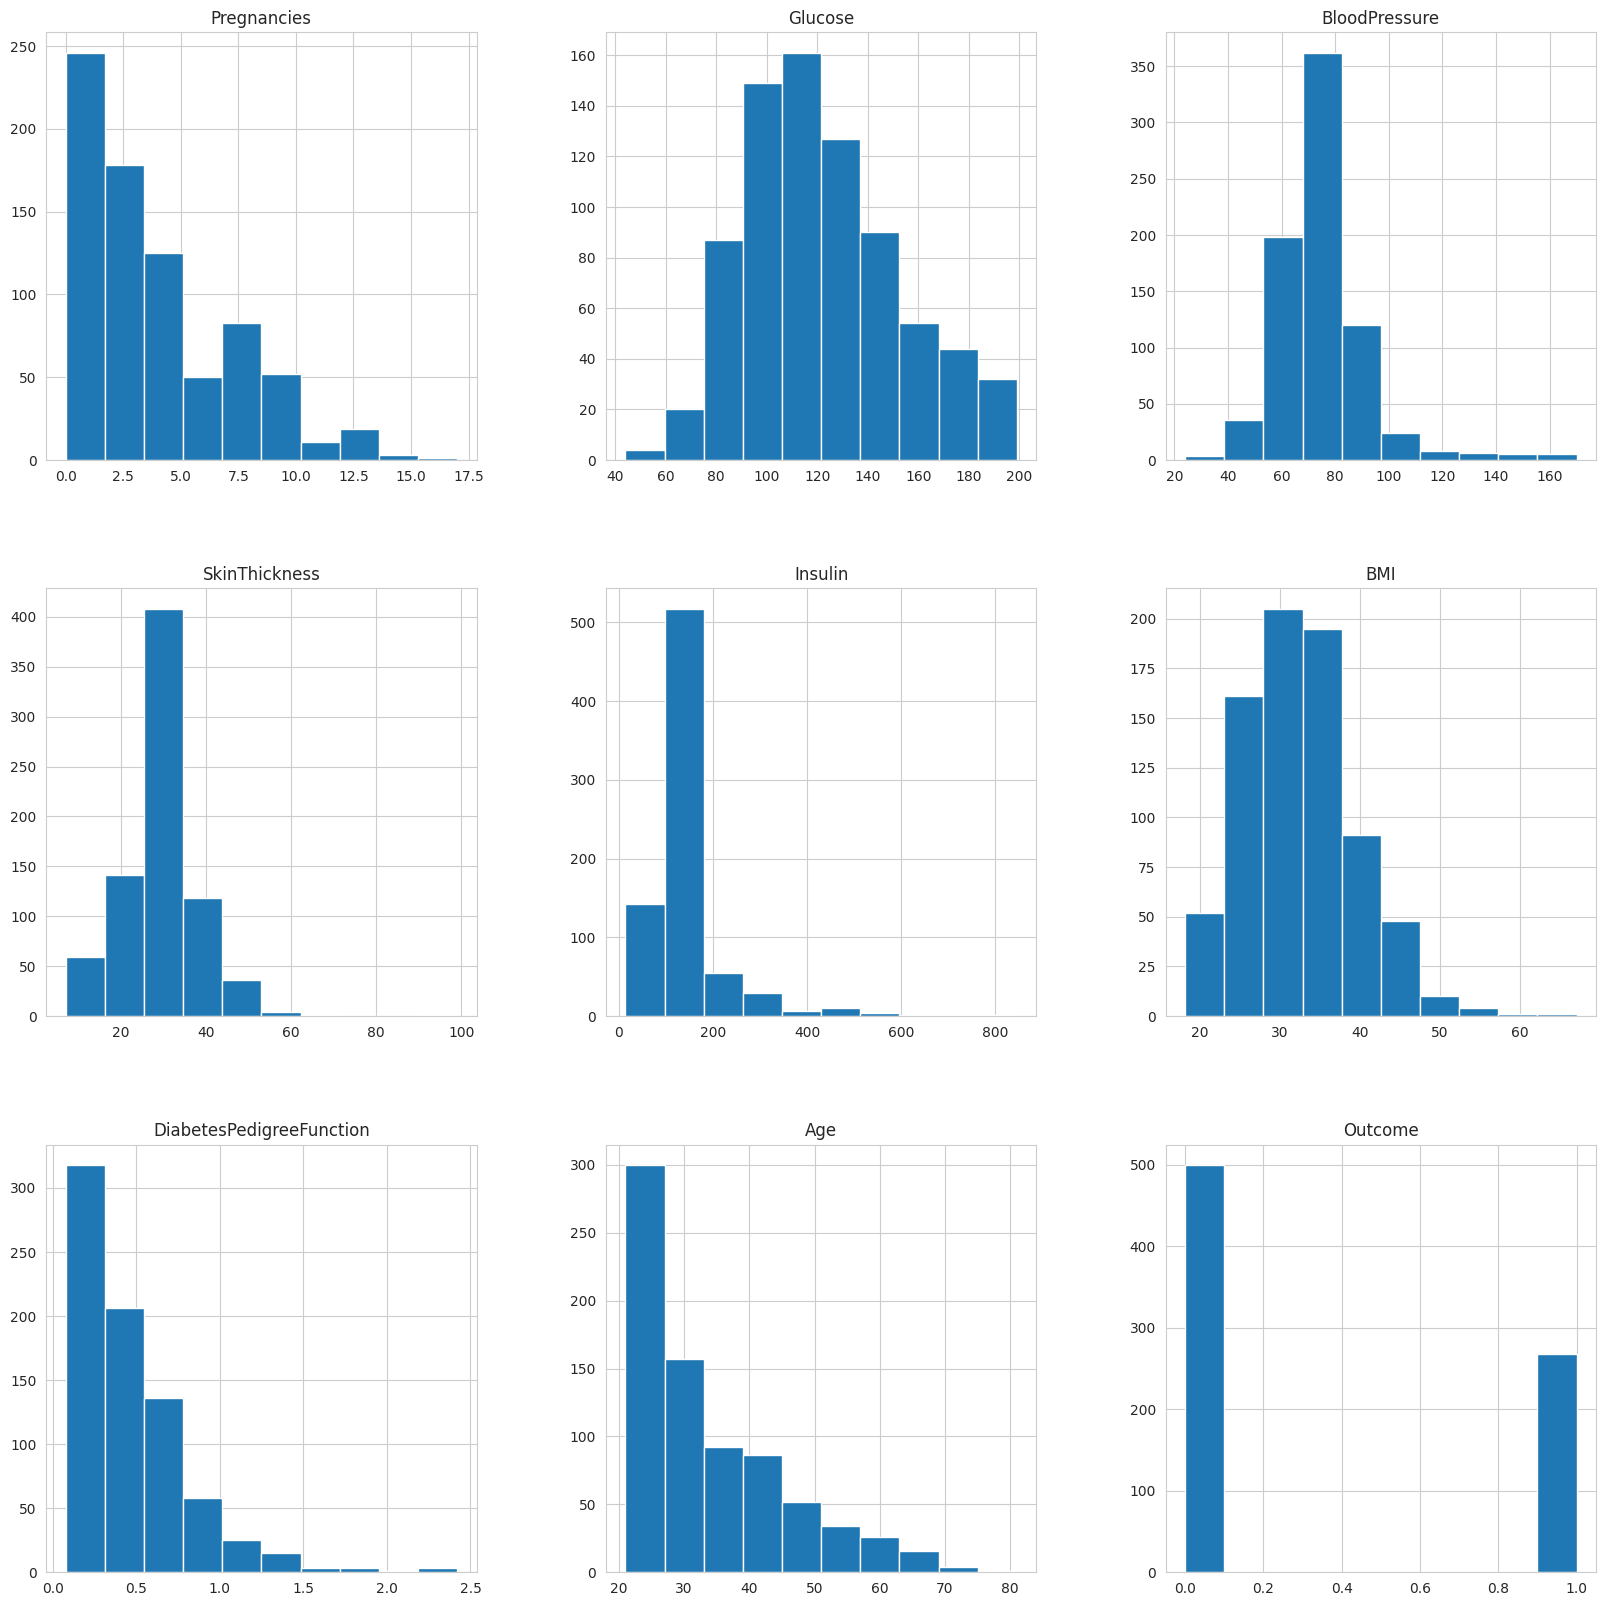

In [43]:
plots = df.hist(figsize = (20,20))

In [44]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125285,0.142975,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.125285,1.000000,0.122285,0.226113,0.485206,0.228985,0.136934,0.263280,0.487063
BloodPressure,0.142975,0.122285,1.000000,0.138670,0.033932,0.199633,-0.044049,0.186511,0.146709
SkinThickness,0.089028,0.226113,0.138670,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.485206,0.033932,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.228985,0.199633,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.136934,-0.044049,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.263280,0.186511,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.487063,0.146709,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


<Axes: >

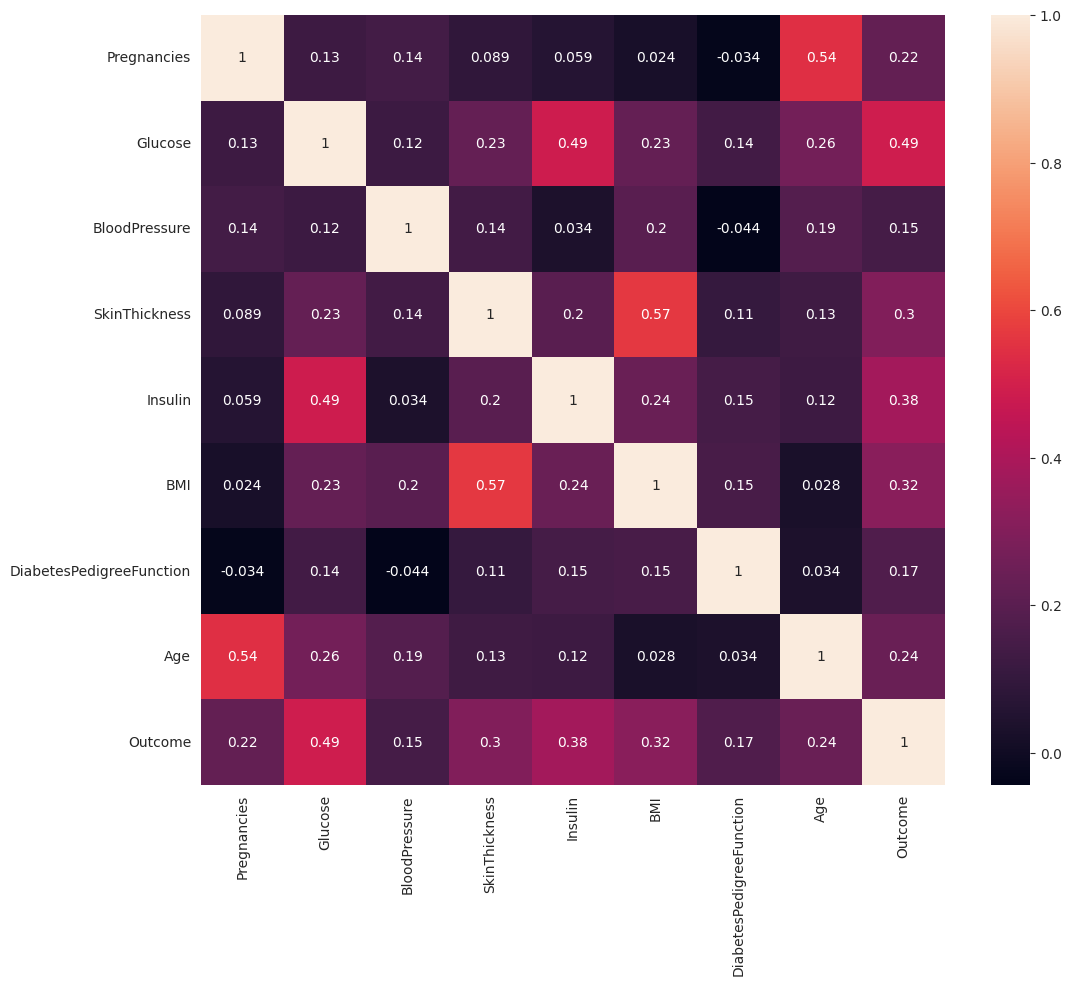

In [45]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

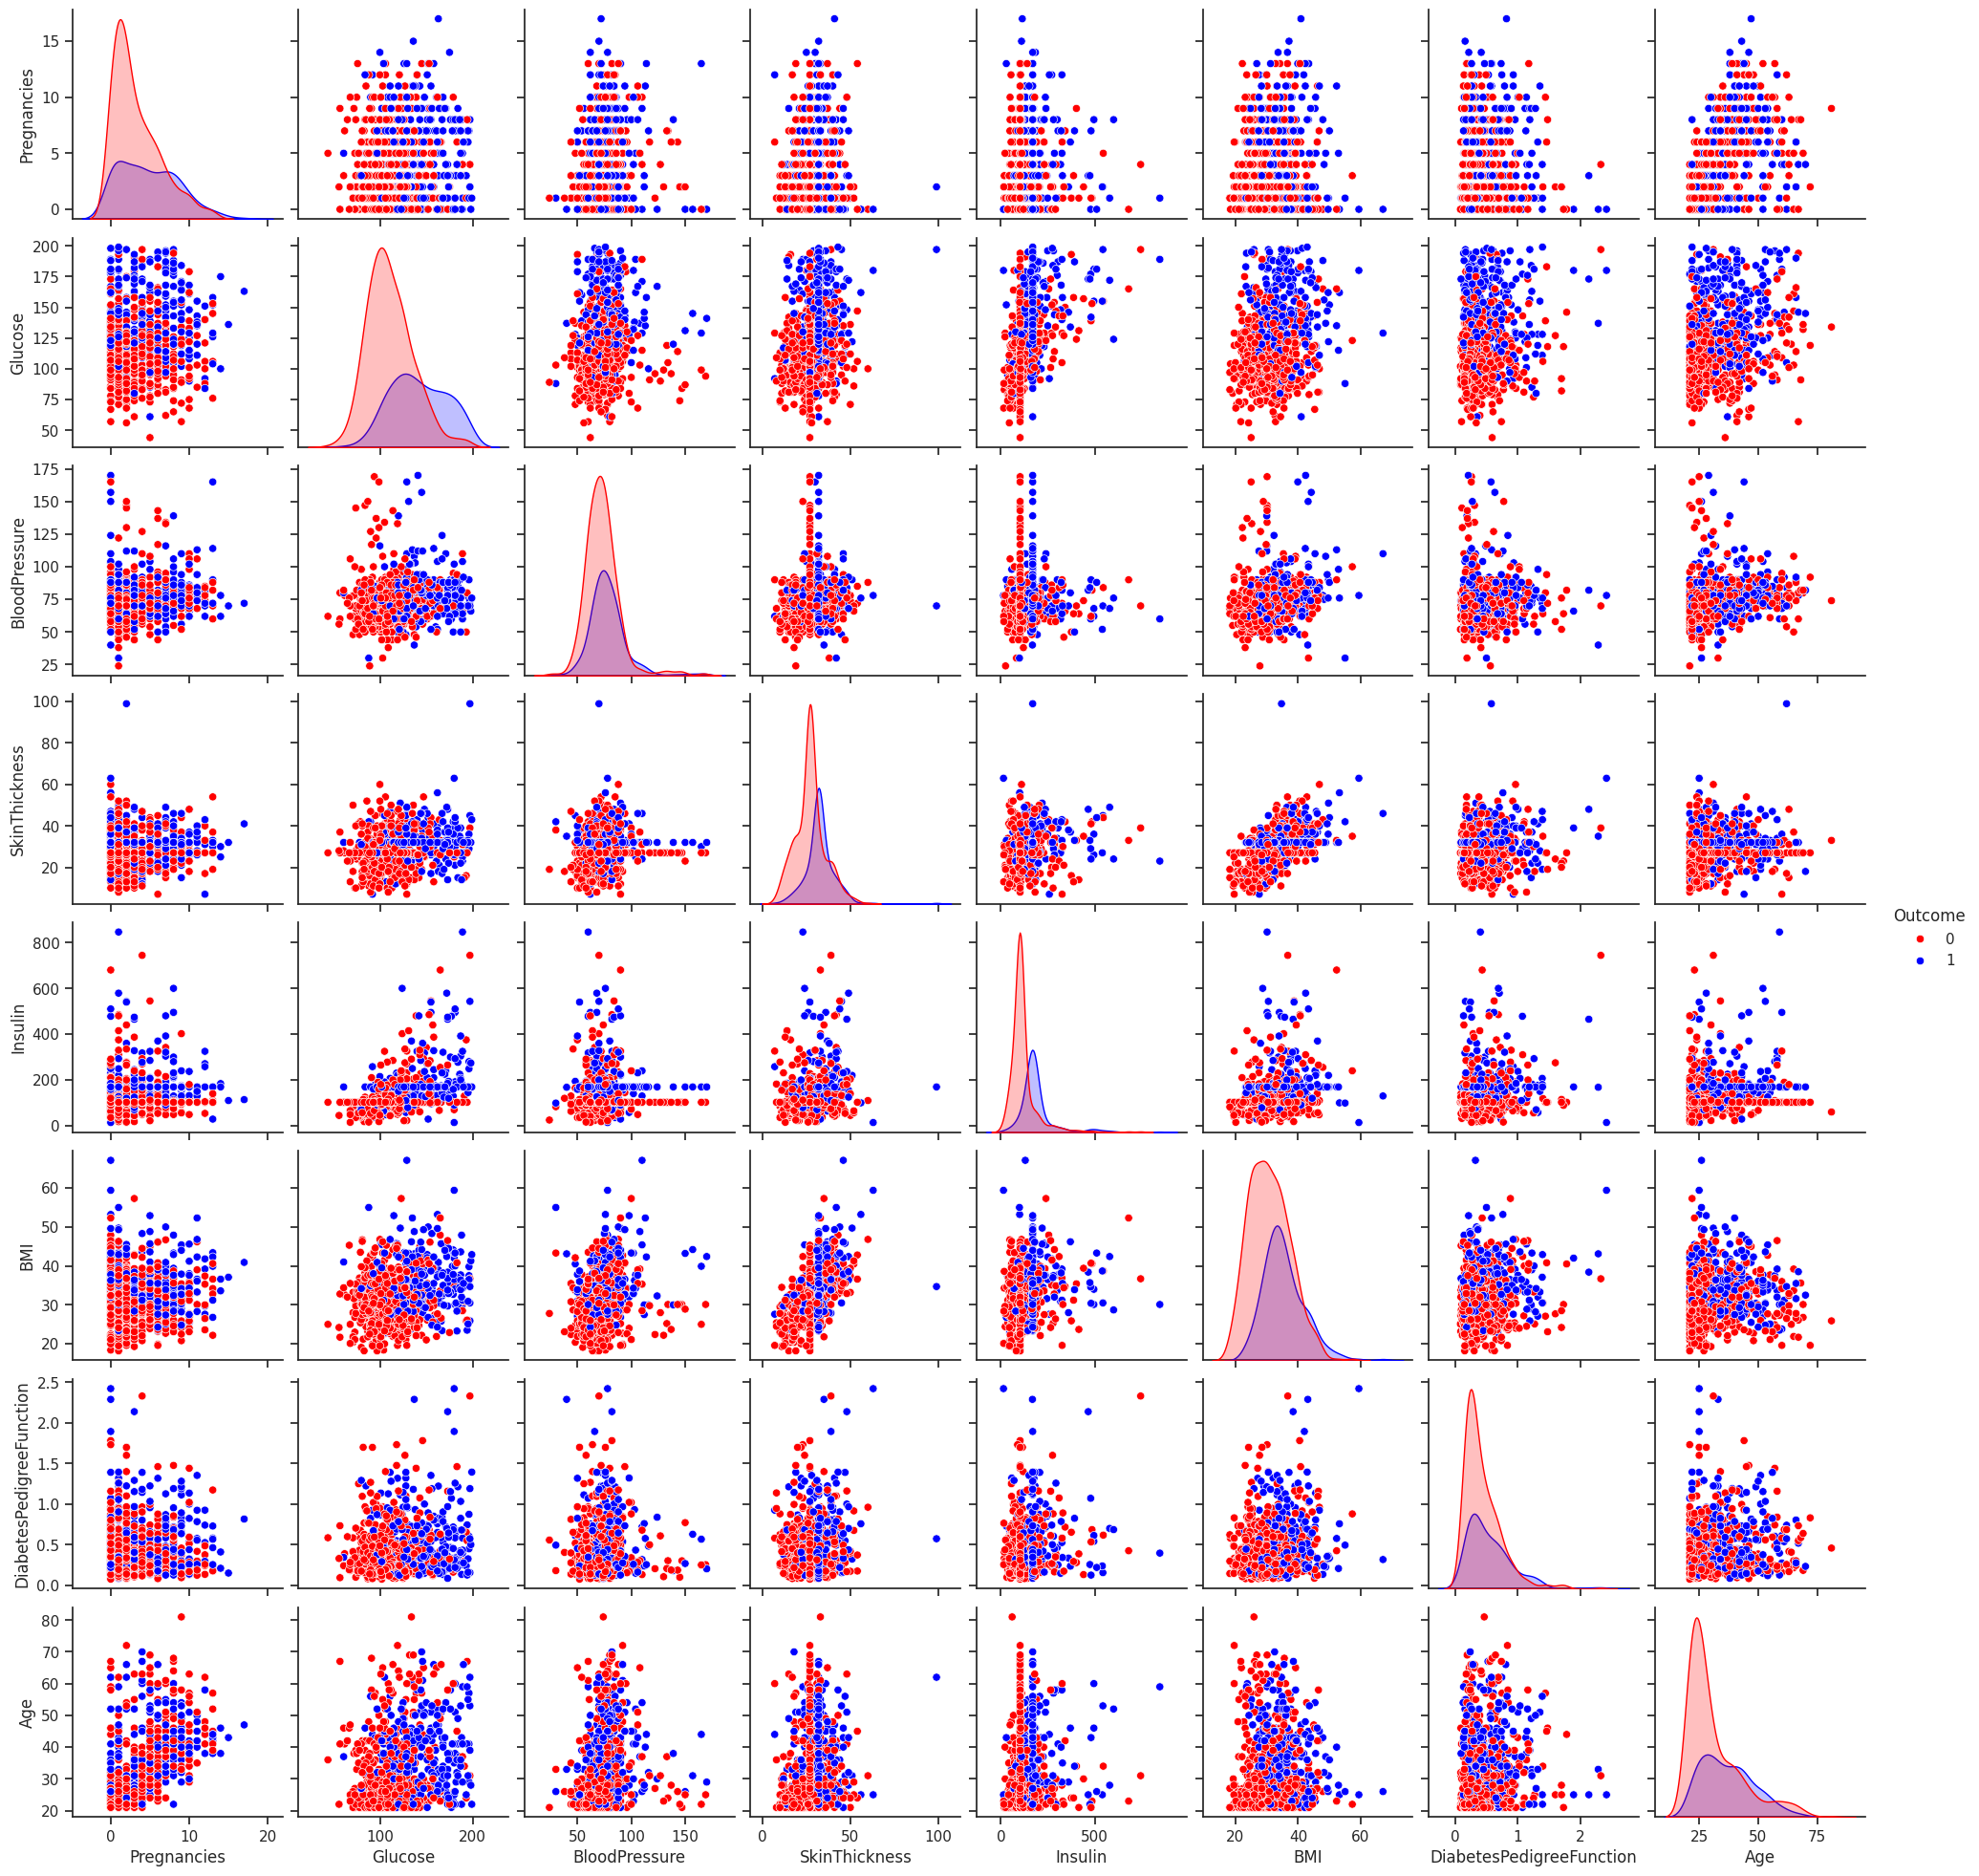

In [46]:
sns.set(style="ticks")
sns.pairplot(df, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"], hue='Outcome', palette={0: 'red', 1: 'blue'})
plt.show()

##**Data Transformation and Feature Engineering**

Feature engineering and data transformation are crucial steps in the data preprocessing pipeline that enhance the quality and predictive power of a machine learning model.

###**1. Feature Engineering**

Feature engineering involves creating new features or modifying existing ones to better capture the underlying patterns in the data. In this case, I created two new features: AgeGroup and BMICategory.

* AgeGroup: By categorizing the 'Age' column into different age ranges, I can better understand the impact of age groups on the outcome. The bins are defined from '20-29' to '80-89', which helps in segmenting the population into meaningful age brackets.

* BMICategory: Similarly, the 'BMI' column is categorized into different BMI ranges such as 'Underweight', 'Normal weight', 'Overweight', and various levels of obesity. This transformation helps to analyze how different BMI categories relate to the outcome.

**Creating AgeGroup and BMICategory:**

* Use pd.cut() to segment 'Age' and 'BMI' into defined categories.
    
* This creates new categorical features that can provide more insights during modeling.

In [47]:
data = df.copy()
# Create age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[20, 29, 39, 49, 59, 69, 79, 89], right=False, labels=[
                        '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])

# Create BMI categories
data['BMICategory'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 49.9],
                           labels=['Underweight', 'Normal weight', 'Overweight', 'Obese I', 'Obese II', 'Obese III'],
                           right=False)

###**Data Transformation:**

Data transformation standardizes and encodes the data, making it suitable for machine learning algorithms.

* Categorical Columns: Categorical columns with fewer than 12 unique values are identified, as they can be efficiently transformed using encoding techniques.
    
* Numerical Columns: Numerical columns are identified by excluding categorical and target columns. These columns will be scaled for normalization.
    
* Binary Columns: Columns with exactly two unique values are identified and label-encoded. This transforms categorical binary data into numerical binary data.
  
* Multi-value Columns: Columns with more than two unique values are one-hot encoded to transform categorical data into a format suitable for algorithms.
  
* Standardization: Numerical columns are standardized using the StandardScaler to ensure they have a mean of 0 and a standard deviation of 1. This normalization process helps to improve the convergence of gradient descent-based algorithms.

**Identifying Columns for Transformation:**

* Identify target, categorical, numerical, binary, and multi-value columns.
  This classification helps in applying appropriate transformations to each type of data.

One-Hot Encoding Multi-value Categorical Columns:

* Use pd.get_dummies() to one-hot encode multi-value categorical columns, effectively creating binary columns for each category.

Label Encoding Binary Columns:

* Use LabelEncoder to transform binary categorical columns into numerical binary columns.

Standardizing Numerical Columns:

* Use StandardScaler to scale numerical columns, ensuring that the data is normalized and ready for modeling.

Merging Scaled Numerical Data:

* Drop the original numerical columns and merge the standardized numerical data back into the dataset.

In [48]:
# Define the target column
target_column = ["Outcome"]

# Identify categorical columns (those with fewer than 12 unique values)
categorical_columns = data.nunique()[data.nunique() < 12].keys().tolist()

# Identify numerical columns by excluding categorical and target columns
numerical_columns = [col for col in data.columns if col not in categorical_columns + target_column]

# Identify binary columns (those with exactly 2 unique values)
binary_columns = data.nunique()[data.nunique() == 2].keys().tolist()

# Identify multi-value categorical columns (those with more than 2 unique values)
multi_value_columns = [col for col in categorical_columns if col not in binary_columns]

# One-hot encode multi-value categorical columns
data = pd.get_dummies(data, columns=multi_value_columns, drop_first=True)

# Label encode binary categorical columns
label_encoder = LabelEncoder()
for col in binary_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(data[numerical_columns])
scaled_numerical_data = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Drop original numerical columns and merge scaled numerical columns
data.drop(columns=numerical_columns, axis=1, inplace=True)
data = data.merge(scaled_numerical_data, left_index=True, right_index=True, how="left")

# Display the first few rows of the preprocessed data
print(data.head())

   Outcome  AgeGroup_30-39  AgeGroup_40-49  AgeGroup_50-59  AgeGroup_60-69  \
0        1           False           False            True           False   
1        0            True           False           False           False   
2        1            True           False           False           False   
3        0           False           False           False           False   
4        1            True           False           False           False   

   AgeGroup_70-79  AgeGroup_80-89  BMICategory_Normal weight  \
0           False           False                      False   
1           False           False                      False   
2           False           False                       True   
3           False           False                      False   
4           False           False                      False   

   BMICategory_Overweight  BMICategory_Obese I  BMICategory_Obese II  \
0                   False                 True                 False   
1 

#**PART 2 - Machine Learning Applications**

##**Data Splitting**

Data splitting is crucial for this machine learning project as it enables me to evaluate the performance of my models on unseen data. By dividing the dataset into training, validation, and testing sets, I can train my model on one subset, fine-tune hyperparameters on another, and assess its performance on a completely independent subset. This process allows me to understand how well my model generalizes to new, unseen data, ensuring that I can make reliable predictions in real-world scenarios.

Define Features and Target:
* The features (X) are defined by dropping the target column ("Outcome") from the dataset.
* The target (y) is defined as the "Outcome" column.

First Split: Training + Validation and Testing Sets:
* I split the data into two parts: 80% for training + validation and 20% for testing. This is done using the train_test_split function with a test_size of 0.2.
* The split is stratified, meaning the class distribution in y is maintained across the training + validation and testing sets.

Second Split: Training and Validation Sets:
* I further split the training + validation set into 75% training and 25% validation. This ensures that 60% of the original data is used for training and 20% for validation (since 0.25 * 0.8 = 0.2).
* Again, the split is stratified to maintain the class distribution.

Convert Target Variable to Series Object:
* The target variable is converted to a Series object to facilitate further processing.

Reshape Target Variable:
* I reshape the target variable (y) into a 1D array using the ravel method. This is necessary for compatibility with certain machine learning algorithms.

Display the Shape of the Datasets:
* Finally, I print the shapes of the training, validation, and testing sets to verify the splits. This helps ensure that the data is correctly partitioned for model training and evaluation.

In [49]:
# Define features (X) and target (y)
X = data.drop(columns=target_column)
y = data[target_column]

# First split: training + validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)
# 0.25 x 0.8 = 0.2, so 20% of the data will be used for validation

# Convert target variable to Series object
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Reshape y to 1D array using ravel()
y_train = y_train.ravel()
y_test = y_test.ravel()

# Display the shape of the datasets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (460, 19), (460,)
Validation set: (154, 19), (154, 1)
Testing set: (154, 19), (154,)


The dataset has been split into three subsets: the training set, the validation set, and the testing set. The training set comprises 460 samples with 19 features, and their corresponding target variable, totaling 460 data points. The validation set consists of 154 samples with the same 19 features, along with their target variable, which is represented as a 1-dimensional array with 154 elements. Similarly, the testing set also contains 154 samples with 19 features each, but the target variable is represented as a 1-dimensional array with 154 elements. This division allows for effective model training, validation, and evaluation, ensuring robust performance in real-world scenarios.

##**Model Selection**

###**Hyperparameter Tuning**

Hyperparameter tuning is essential for maximizing the performance of my model by adjusting parameters like learning rates or tree depths, which are not learned during training. This process helps me achieve optimal predictive accuracy and generalization, ensuring my model performs well in real-world scenarios.

In my approach, I utilize grid search and cross-validation to optimize hyperparameters for logistic regression, decision tree, and random forest models. This iterative process allows me to select the best hyperparameter values from predefined grids, enhancing each model's performance. Subsequently, I evaluate the accuracy and various performance metrics, such as precision, recall, and F1-score, on a validation set to assess the effectiveness of each model.

In [50]:
# Define the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Perform Grid Search with cross-validation
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters for Logistic Regression:", log_reg_grid.best_params_)
log_reg_best = log_reg_grid.best_estimator_
y_val_pred = log_reg_best.predict(X_val)
print("Validation Accuracy for Logistic Regression:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Validation Accuracy for Logistic Regression: 0.8246753246753247
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       100
           1       0.81      0.65      0.72        54

    accuracy                           0.82       154
   macro avg       0.82      0.78      0.80       154
weighted avg       0.82      0.82      0.82       154



The logistic regression model with hyperparameters C=0.1 and solver='liblinear' achieves a validation accuracy of approximately 82%, exhibiting good precision and recall metrics for both classes.

In [51]:
# Define the model
decision_tree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
decision_tree_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
decision_tree_grid = GridSearchCV(decision_tree, decision_tree_params, cv=5, scoring='accuracy')
decision_tree_grid.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters for Decision Tree:", decision_tree_grid.best_params_)
decision_tree_best = decision_tree_grid.best_estimator_
y_val_pred = decision_tree_best.predict(X_val)
print("Validation Accuracy for Decision Tree:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Validation Accuracy for Decision Tree: 0.8441558441558441
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       100
           1       0.75      0.83      0.79        54

    accuracy                           0.84       154
   macro avg       0.83      0.84      0.83       154
weighted avg       0.85      0.84      0.85       154



The decision tree model with parameters max_depth=None, min_samples_leaf=1, and min_samples_split=10 attains a validation accuracy of approximately 84%, demonstrating slightly better precision and recall for class 0 while maintaining comparable metrics for class 1 compared to the logistic regression model.

In [52]:
# Define the model
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid
random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
random_forest_grid = GridSearchCV(random_forest, random_forest_params, cv=5, scoring='accuracy')
random_forest_grid.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters for Random Forest:", random_forest_grid.best_params_)
random_forest_best = random_forest_grid.best_estimator_
y_val_pred = random_forest_best.predict(X_val)
print("Validation Accuracy for Random Forest:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Validation Accuracy for Random Forest: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       100
           1       0.84      0.91      0.88        54

    accuracy                           0.91       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.91      0.91      0.91       154



The random forest model, with hyperparameters max_depth=None, min_samples_leaf=4, min_samples_split=10, and n_estimators=100, yields the highest validation accuracy of approximately 91%, showing superior precision, recall, and F1-score for class 0 while maintaining good performance for class 1 compared to both logistic regression and decision tree models.

##**Model Training and Evaluation Key Points**

###**Performances of Different Models**

I train logistic regression, decision tree, and random forest models using the preprocessed data and hyperparameters obtained through hyperparameter tuning. Then, I evaluate each model's performance using metrics such as confusion matrix, precision, recall, and F1-score, allowing me to compare their effectiveness in predicting the outcome variable on the test set.

In [53]:
# Train Logistic Regression model
log_reg = LogisticRegression(C=0.1, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train Decision Tree model
dec_tree = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10)
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)

# Train Random Forest model
rand_forest = RandomForestClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)

# Evaluate models
models = {
    "Logistic Regression": y_pred_log_reg,
    "Decision Tree": y_pred_dec_tree,
    "Random Forest": y_pred_rand_forest
}

for model_name, y_pred in models.items():
    print(f"Evaluation for {model_name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

Evaluation for Logistic Regression:
Confusion Matrix:
[[82 18]
 [22 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       100
           1       0.64      0.59      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



Evaluation for Decision Tree:
Confusion Matrix:
[[85 15]
 [10 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       100
           1       0.75      0.81      0.78        54

    accuracy                           0.84       154
   macro avg       0.82      0.83      0.83       154
weighted avg       0.84      0.84      0.84       154



Evaluation for Random Forest:
Confusion Matrix:
[[90 10]
 [12 42]]
Classification Report:
              precision    recall  f1-score   support

           

###**Cross Validation**

I will employ cross-validation to ensure that the model's performance estimates are robust and not overly influenced by the specific train-test split. By averaging the performance metrics over multiple folds, cross-validation provides a more reliable assessment of the model's generalization ability and helps in detecting overfitting or underfitting issues.

In [54]:
def cross_val_evaluation(model, X, y, cv=5):
    # Convert y to a NumPy array if it is a pandas DataFrame
    if isinstance(y, pd.DataFrame):
        y = y.values.ravel()
    elif isinstance(y, pd.Series):
        y = y.values
    else:
        y = y.ravel()

    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-validation accuracy scores: {scores}")
    print(f"Mean cross-validation accuracy: {scores.mean()}")

print("Cross-validation for Logistic Regression:")
cross_val_evaluation(log_reg, X, y)

print("\nCross-validation for Decision Tree:")
cross_val_evaluation(dec_tree, X, y)

print("\nCross-validation for Random Forest:")
cross_val_evaluation(rand_forest, X, y)

Cross-validation for Logistic Regression:
Cross-validation accuracy scores: [0.79220779 0.77272727 0.81818182 0.83660131 0.77777778]
Mean cross-validation accuracy: 0.7994991936168407

Cross-validation for Decision Tree:
Cross-validation accuracy scores: [0.87012987 0.81818182 0.85714286 0.88235294 0.90196078]
Mean cross-validation accuracy: 0.8659536541889483

Cross-validation for Random Forest:
Cross-validation accuracy scores: [0.87662338 0.85064935 0.86363636 0.90849673 0.89542484]
Mean cross-validation accuracy: 0.8789661319073083


###**Class Imbalance**

Employing class imbalance techniques is crucial for me to address scenarios where one class significantly outnumbers the other. This ensures my model isn't biased towards the majority class, leading to fair representation of all classes in the training process, thereby enhancing my model's predictive performance and generalization ability.

In [55]:
!pip install imbalanced-learn -q

I'm using SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance. Specifically, I'm oversampling the minority class in the training set (X_train and y_train) to create synthetic samples, balancing the class distribution. This helps prevent the model from being biased towards the majority class and improves its ability to learn patterns from both classes effectively.

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Training Models: Initially, I fit three models – Logistic Regression, Decision Tree, and Random Forest – on the resampled training data obtained from SMOTE.

Predicting Probabilities: Following model training, I predict the probabilities of the positive class (class 1) for each model on the test set using the predict_proba method.

Calculating ROC-AUC Scores: Subsequently, I calculate the ROC-AUC scores for each model by comparing these predicted probabilities with the actual target values (y_test). This helps evaluate the models' performance in terms of their ability to discriminate between the positive and negative classes.

Calculating Accuracy Scores: Finally, I compute the accuracy scores for each model by comparing their predictions on the test set with the actual target values. This assessment aids in understanding how well the models perform in terms of overall classification accuracy.

In [57]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Train the models on the resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)
dec_tree.fit(X_train_resampled, y_train_resampled)
rand_forest.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the test set
y_pred_log_reg_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred_dec_tree_proba = dec_tree.predict_proba(X_test)[:, 1]
y_pred_rand_forest_proba = rand_forest.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC scores
print("ROC-AUC for Logistic Regression:", roc_auc_score(y_test, y_pred_log_reg_proba))
print("ROC-AUC for Decision Tree:", roc_auc_score(y_test, y_pred_dec_tree_proba))
print("ROC-AUC for Random Forest:", roc_auc_score(y_test, y_pred_rand_forest_proba))

# Calculate accuracy scores
print("Accuracy for Logistic Regression:", accuracy_score(y_test, log_reg.predict(X_test)))
print("Accuracy for Decision Tree:", accuracy_score(y_test, dec_tree.predict(X_test)))
print("Accuracy for Random Forest:", accuracy_score(y_test, rand_forest.predict(X_test)))

ROC-AUC for Logistic Regression: 0.8440740740740742
ROC-AUC for Decision Tree: 0.8607407407407408
ROC-AUC for Random Forest: 0.9401851851851852
Accuracy for Logistic Regression: 0.7662337662337663
Accuracy for Decision Tree: 0.8376623376623377
Accuracy for Random Forest: 0.8701298701298701


###**Analyzing the Importance of Features for the Best Performing Model**

Analyzing feature importance for the top-performing model reveals the most influential variables, aiding in understanding data patterns and improving model interpretability and performance.

**Feature Importance Extraction:** I retrieve the feature importances from the trained Random Forest model.

**DataFrame Creation:** Using these importances and the feature names, I construct a DataFrame to facilitate better visualization and interpretation.

**Sorting by Importance:** I arrange the DataFrame in descending order based on the feature importances to highlight the most influential features.

**Visualization:** Utilizing matplotlib, I create a horizontal bar plot where each feature's importance is represented, offering a clear depiction of their relative significance in the Random Forest model.

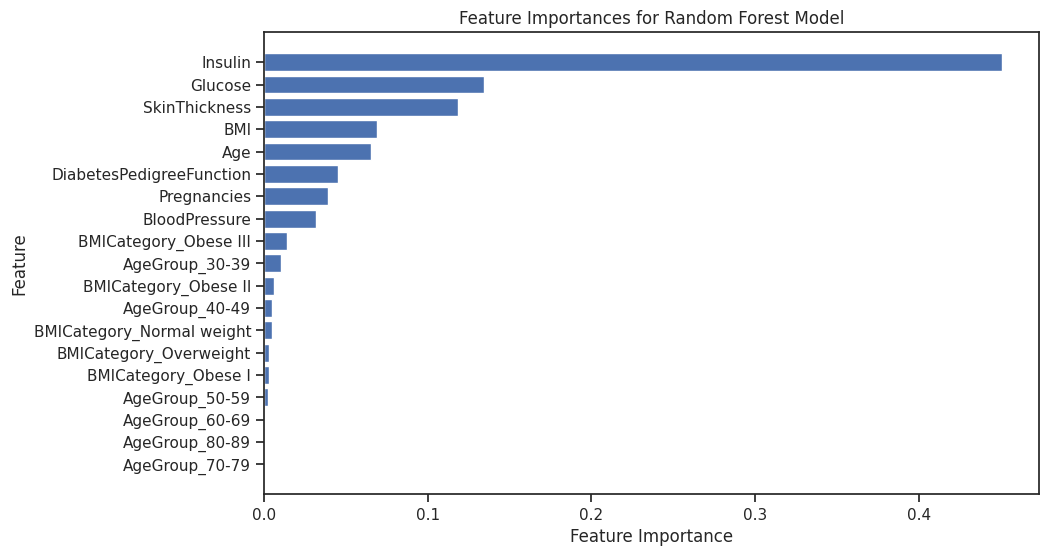

In [58]:
# Get feature importances
feature_importances = rand_forest.feature_importances_

# Get feature names
feature_names = X.columns if isinstance(X, pd.DataFrame) else np.arange(X.shape[1])

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.title('Feature Importances for Random Forest Model')
plt.show()

##**Conclusions**

###**Key Findings from the EDA Analysis**

**1. Descriptive Statistics:**

**Central Tendency and Dispersion:**

* The dataset's basic statistics revealed significant variation in key variables such as Glucose, Insulin, and BMI.
* The mean and median values for most variables were informative of the central tendency, while the standard deviation highlighted the spread.


**Key Observations:**

* Pregnancies: Women had a varying number of pregnancies, with a median of 3 and a max value of 17.
* Glucose: The average glucose level was around 121, with higher values indicative of diabetes.
* Blood Pressure: The mean blood pressure was around 72 mm Hg, which aligns with the normal range, but values varied widely.
* Skin Thickness: This variable had a wide range, reflecting differences in adiposity.
* Insulin: Insulin levels showed high variance, indicating possible cases of insulin resistance.
* BMI: The mean BMI was around 32, which is considered obese.
* Age: Age ranged from 21 to 81, with a mean of 33 years.
* Diabetes Pedigree Function: This genetic function showed variance, with higher values possibly indicating a stronger hereditary diabetes risk.

**2. Histograms:**

**Distribution Insights:**

* Pregnancies: Skewed distribution indicating that most women had fewer pregnancies.
* Glucose: Bimodal distribution with a significant number of high glucose values.
* Blood Pressure and BMI: Normal distribution patterns but with some outliers.
* Insulin: Highly skewed with many low values but some very high outliers.
* Age: Slightly right-skewed, indicating more young participants.
* Outcome: Binary distribution showing the number of positive and negative diabetes cases.

**3. Correlation Heatmap:**

**Correlation Insights:**

* Strongest Positive Correlations:
  * Glucose and Outcome (0.47): Higher glucose levels are strongly associated with diabetes.
  * BMI and Outcome (0.31): Higher BMI correlates with diabetes.
  * Age and Outcome (0.24): Older age is somewhat associated with higher diabetes risk.
* Insulin and Glucose (0.58): Higher insulin levels often accompany higher glucose levels, suggesting insulin resistance.
* Skin Thickness and BMI (0.44): Thicker skin fold measurements are correlated with higher BMI.

**4. Pairplot:**

**Variable Relationships and Class Separation:**

* The pairplot revealed distinct clusters for diabetic (blue) and non-diabetic (red) outcomes.
* Glucose: Clear separation between diabetic and non-diabetic individuals, with higher glucose levels more common in diabetics.
* BMI and Age: Overlapping distributions but higher BMI and older age generally associated with diabetes.
* Insulin: Diabetic individuals tend to have higher insulin levels, indicating insulin resistance.
* Pregnancies: While varied, higher pregnancies are slightly more common in diabetic cases.

**Conclusion**

Key patterns and relationships identified include:

* Glucose Levels: Most significant predictor of diabetes, with higher levels strongly associated with the condition.
* BMI and Insulin: Both important factors, with higher values indicating a higher risk of diabetes.
* Age: Older individuals have a higher risk of diabetes.
* Correlations: Identified important correlations among features, highlighting the interdependence of physiological measurements in predicting diabetes.

###**Key Findings from the ML Applicatiion Development**

**1. Dominant Feature: Insulin**
  * The feature Insulin stands out as the most important feature by a significant margin, with an importance score well above 0.4. This suggests that Insulin levels play a crucial role in the model's prediction, indicating a strong relationship between insulin and the target variable.

**2. High Importance Features: SkinThickness and Glucose**
  * SkinThickness and Glucose are the next most important features, with importance scores slightly above 0.1. These features are also critical for the model's predictions, though not as dominant as Insulin.

**3. Moderate Importance Features: BMI, Age, DiabetesPedigreeFunction, Pregnancies, and BloodPressure**
  * Features like BMI, Age, DiabetesPedigreeFunction, Pregnancies, and BloodPressure have moderate importance scores ranging from around 0.05 to 0.1. These features contribute meaningfully to the model, but less so than the top three features.

**4. Lower Importance Features: BMI Category and Age Group**
  * Several features related to BMI categories (BMICategory_Obese III, BMICategory_Normal weight, BMICategory_Overweight, BMICategory_Obese I, BMICategory_Obese II) and age groups (AgeGroup_30-39, AgeGroup_50-59, AgeGroup_40-49, AgeGroup_60-69, AgeGroup_80-89, AgeGroup_70-79) have much lower importance scores, indicating they contribute less to the model's predictions.

**Insulin:** Its high importance suggests that insulin levels are a critical indicator of the target variable, likely diabetes in this context. This aligns with medical knowledge that insulin resistance and levels are key factors in diabetes management and diagnosis.

**SkinThickness and Glucose:** Both features are also important in predicting diabetes. High skinfold thickness is often associated with higher body fat, which is a risk factor for diabetes. Glucose levels are directly related to blood sugar control, a primary concern in diabetes.

**BMI, Age, DiabetesPedigreeFunction, Pregnancies, and BloodPressure:** These features have moderate importance. BMI and blood pressure are well-known risk factors for diabetes. The number of pregnancies can affect a woman's likelihood of developing gestational diabetes, which can increase the risk of type 2 diabetes later in life. The DiabetesPedigreeFunction provides a synthesis of genetic predisposition, and age is a general risk factor, with older individuals being more susceptible to diabetes.

**BMI Category and Age Group:** These categorical features have relatively low importance. While they provide some predictive power, they are less influential compared to continuous variables like insulin and glucose levels. This could be because the categorical groupings might lose some granularity compared to their continuous counterparts.


###**Performance of the Different ML Models Evaluated**

After training and evaluating the models, I observed that the Random Forest model outperformed both Logistic Regression and Decision Tree models in terms of accuracy, precision, recall, and F1-score on the test set. This indicates that the ensemble approach of Random Forest, combining multiple decision trees, resulted in better predictive performance compared to individual models. Additionally, the Decision Tree model showed slightly better performance than Logistic Regression, suggesting that the nonlinear decision boundaries captured by decision trees may be more suitable for this classification task than the linear boundaries assumed by logistic regression.

The cross-validation results suggest that the decision tree and random forest models consistently outperform the logistic regression model in terms of accuracy. The logistic regression model shows moderate accuracy scores across folds. In contrast, both the decision tree and random forest models exhibit higher accuracy scores. This indicates that the decision tree and random forest models generalize better to unseen data compared to the logistic regression model, making them potentially more suitable for the classification task at hand.

The Random Forest model achieved the highest ROC-AUC score, indicating its superior ability to discriminate between classes compared to Logistic Regression and Decision Tree. Moreover, Random Forest also exhibited the highest accuracy score, followed by Decision Tree and Logistic Regression, suggesting its overall better performance in classification accuracy.

**Comparison Overview**

Performance:
* Random Forest has the highest mean accuracy, indicating it performs best on average across the cross-validation folds.
* Decision Tree also performs well, but not as high as Random Forest.
* Logistic Regression has the lowest mean accuracy, which suggests it might not be as effective for this particular dataset.

Consistency:
* Random Forest and Decision Tree models show consistently high scores across the folds, indicating stable performance.
* Logistic Regression shows more variability in its scores, which might be due to its simpler linear nature compared to the more complex tree-based models.

Model Selection:
* Given these results, Random Forest is likely the best choice due to its highest mean accuracy and consistent performance across folds.
* Decision Tree is also a strong candidate but might not generalize as well as Random Forest.
* Logistic Regression might be less suitable for this dataset, but it could still be useful if interpretability and simplicity are important factors.
